In [1]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,classification_report, PrecisionRecallDisplay, brier_score_loss
from sklearn.metrics import roc_curve, auc
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder,MinMaxScaler
from sklearn.feature_selection import SelectFromModel, RFE,RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import shap
from xgboost import XGBClassifier
import seaborn as sn
import numpy as np
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


**Load Dataset**

In [2]:
train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv',index_col=0)
test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv',index_col=0)

**Explore the data**

In [4]:
#Train Dataset
train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
#Test set
test.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 1 to 101503
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

In [9]:
test.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


**Clean the data & Create feature and target set**

In [10]:
train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [3]:
train=train.fillna(0)
train.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [4]:
#df train dataset with 10 features
df_train=train.drop('SeriousDlqin2yrs', axis=1)
df_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [5]:
# Train result 
df_train_target = train[['SeriousDlqin2yrs']]
df_train_target

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0
...,...
149996,0
149997,0
149998,0
149999,0


In [6]:
# df Test dataset
df_test=test.drop('SeriousDlqin2yrs', axis=1)
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


**Analysis of the input dataset**

In [20]:
#Descriptive statistics
print(df_train.shape)
df_train.describe().T

(150000, 10)


,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,150000.0,5348.138920,13152.057250,0.0,1550.000000,4357.500000,7400.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240387,4.155179,0.0,0.000000,0.000000,0.000000,98.0
NumberOfDependents,150000.0,0.737413,1.107021,0.0,0.000000,0.000000,1.000000,20.0


In [21]:
print(df_test.shape)
df_test.describe().T

(101503, 10)


,count,mean,std,min,25%,50%,75%,max
RevolvingUtilizationOfUnsecuredLines,101503.0,5.310000,196.156039,0.0,0.030131,0.152586,0.564225,21821.0
age,101503.0,52.405436,14.779756,21.0,41.000000,52.000000,63.000000,104.0
NumberOfTime30-59DaysPastDueNotWorse,101503.0,0.453770,4.538487,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,101503.0,344.475020,1632.595231,0.0,0.173423,0.364260,0.851619,268326.0
MonthlyIncome,81400.0,6855.035590,36508.600375,0.0,3408.000000,5400.000000,8200.000000,7727000.0
NumberOfOpenCreditLinesAndLoans,101503.0,8.453514,5.144100,0.0,5.000000,8.000000,11.000000,85.0
NumberOfTimes90DaysLate,101503.0,0.296691,4.515859,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,101503.0,1.013074,1.110253,0.0,0.000000,1.000000,2.000000,37.0
NumberOfTime60-89DaysPastDueNotWorse,101503.0,0.270317,4.503578,0.0,0.000000,0.000000,0.000000,98.0
NumberOfDependents,98877.0,0.769046,1.136778,0.0,0.000000,0.000000,1.000000,43.0


In [22]:
print(df_train_target.shape)
df_train_target.describe().T

(150000, 1)


,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.06684,0.249746,0.0,0.0,0.0,0.0,1.0


**Data visualization**

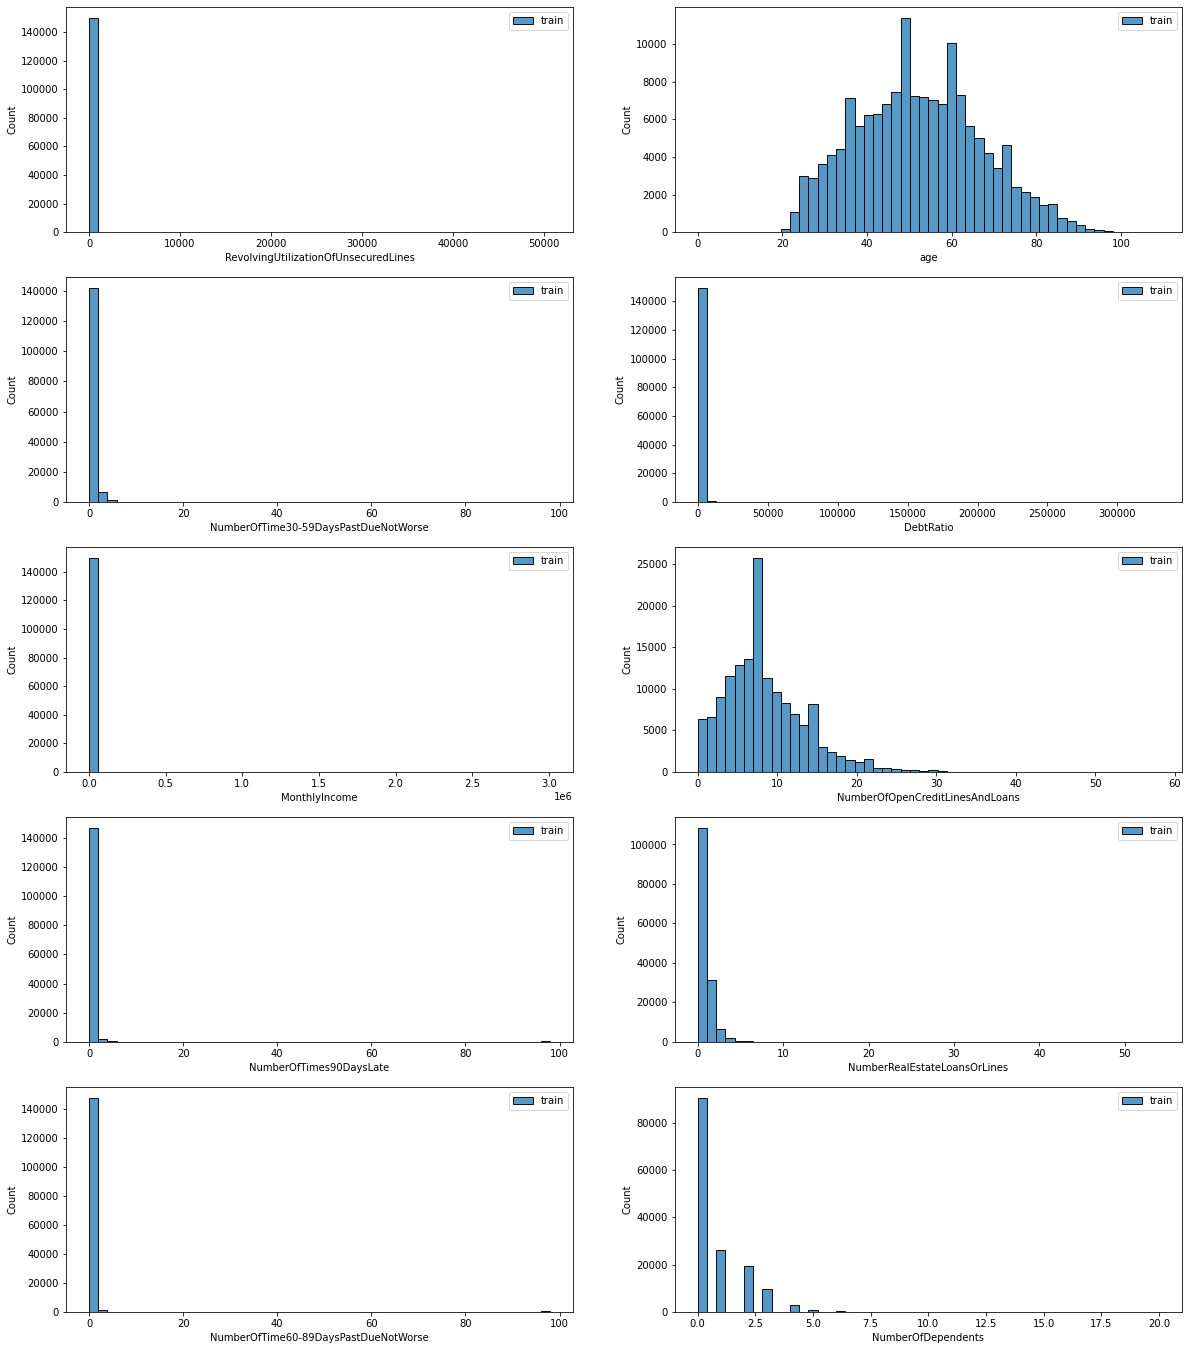

In [78]:
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
i = 1
for index,feature in enumerate(df_train.columns):
    plt.subplot(5, 2,i)
    sn.histplot(df_train[feature], bins=50, label='train')
    plt.xlabel(feature)
    plt.legend()
    i += 1  
plt.show()

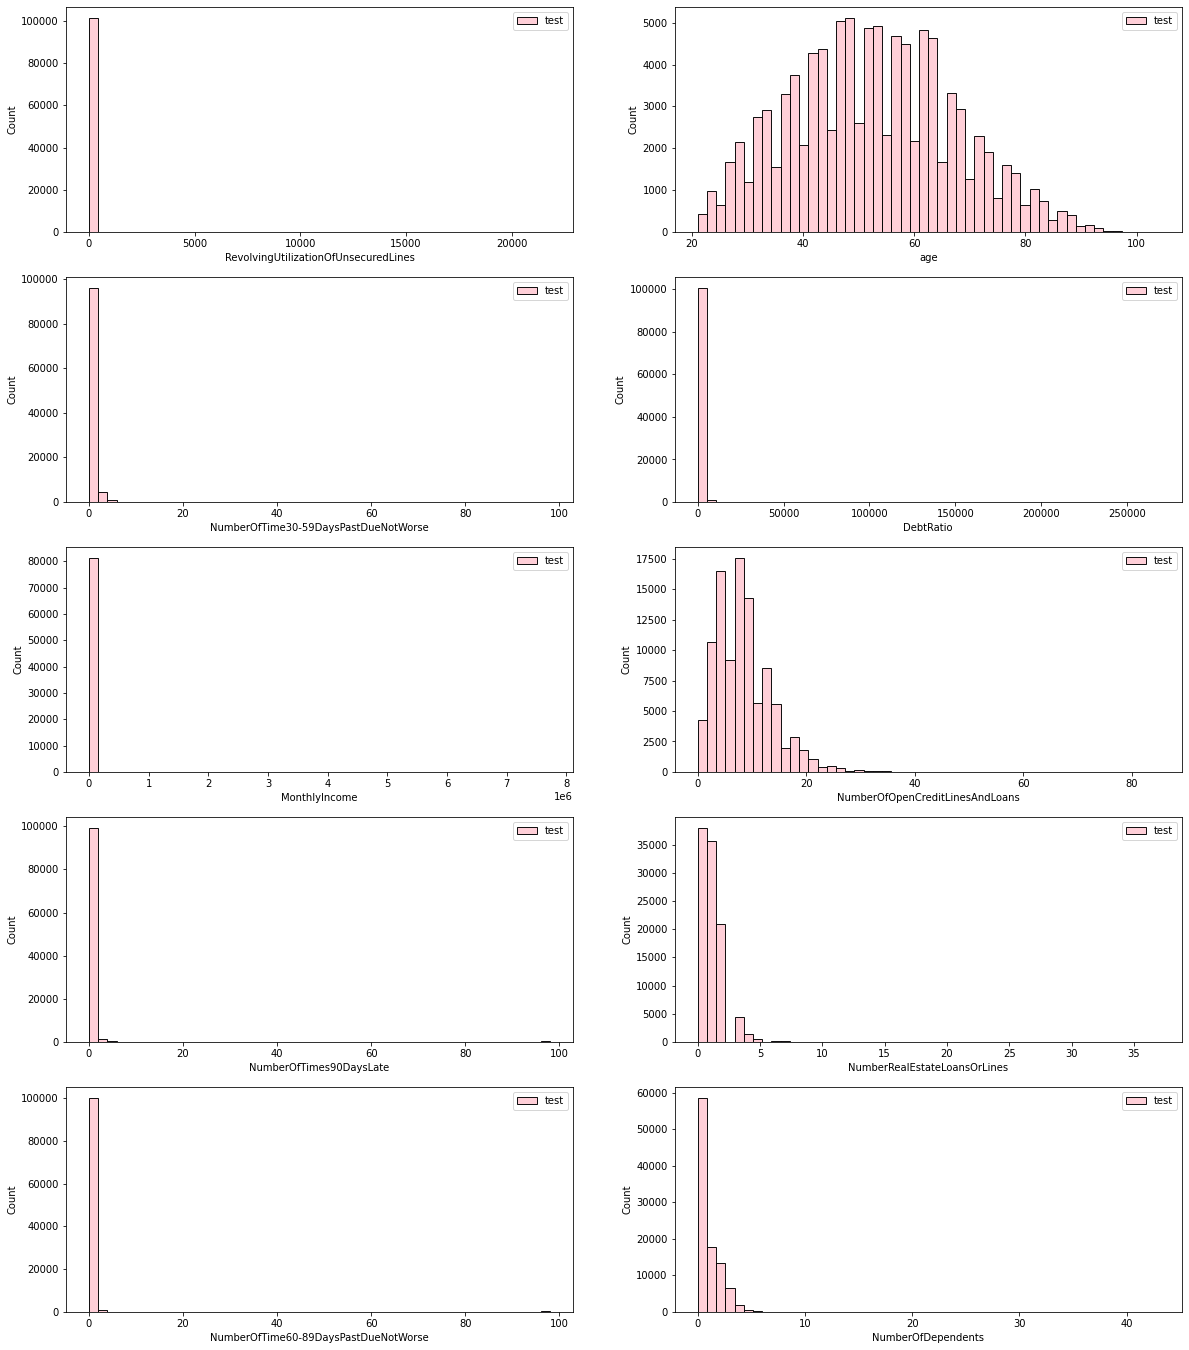

In [79]:
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
i=1
for index,feature in enumerate(df_test.columns):
    plt.subplot(5, 2,i)
    sn.histplot(df_test[feature],color="pink",bins=50, label='test')
    plt.xlabel(feature)
    plt.legend()
    i += 1
plt.show()

Text(0.5, 0, 'SeriousDlqin2yrs')

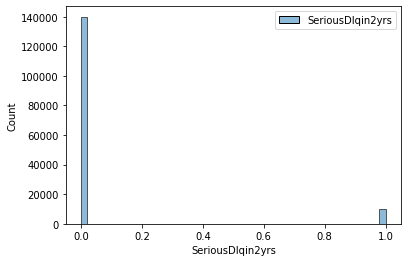

In [64]:
sn.histplot(df_train_target,color="pink",bins=50)
plt.xlabel('SeriousDlqin2yrs')

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

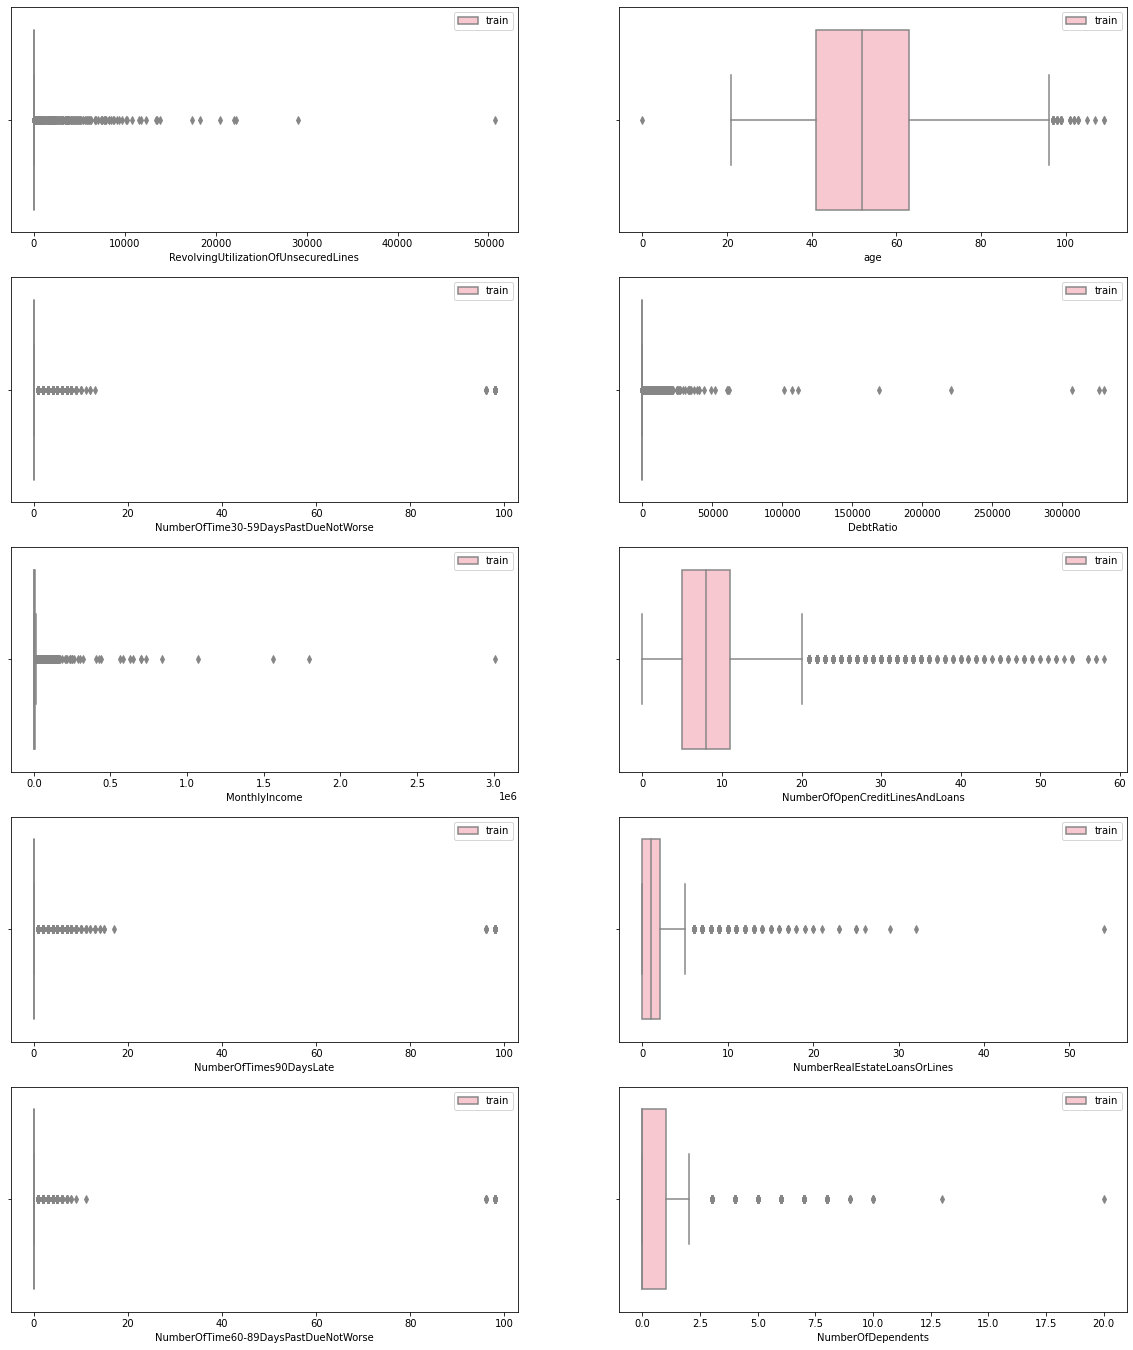

In [85]:
# box plot of train set features to find outliers 
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
i=1
for index,feature in enumerate(df_train.columns):
    plt.subplot(5, 2,i)
    sn.boxplot(df_train[feature],color="pink")
    plt.xlabel(feature)
    i += 1
    plt.legend(labels=['train'])
plt.show()

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data

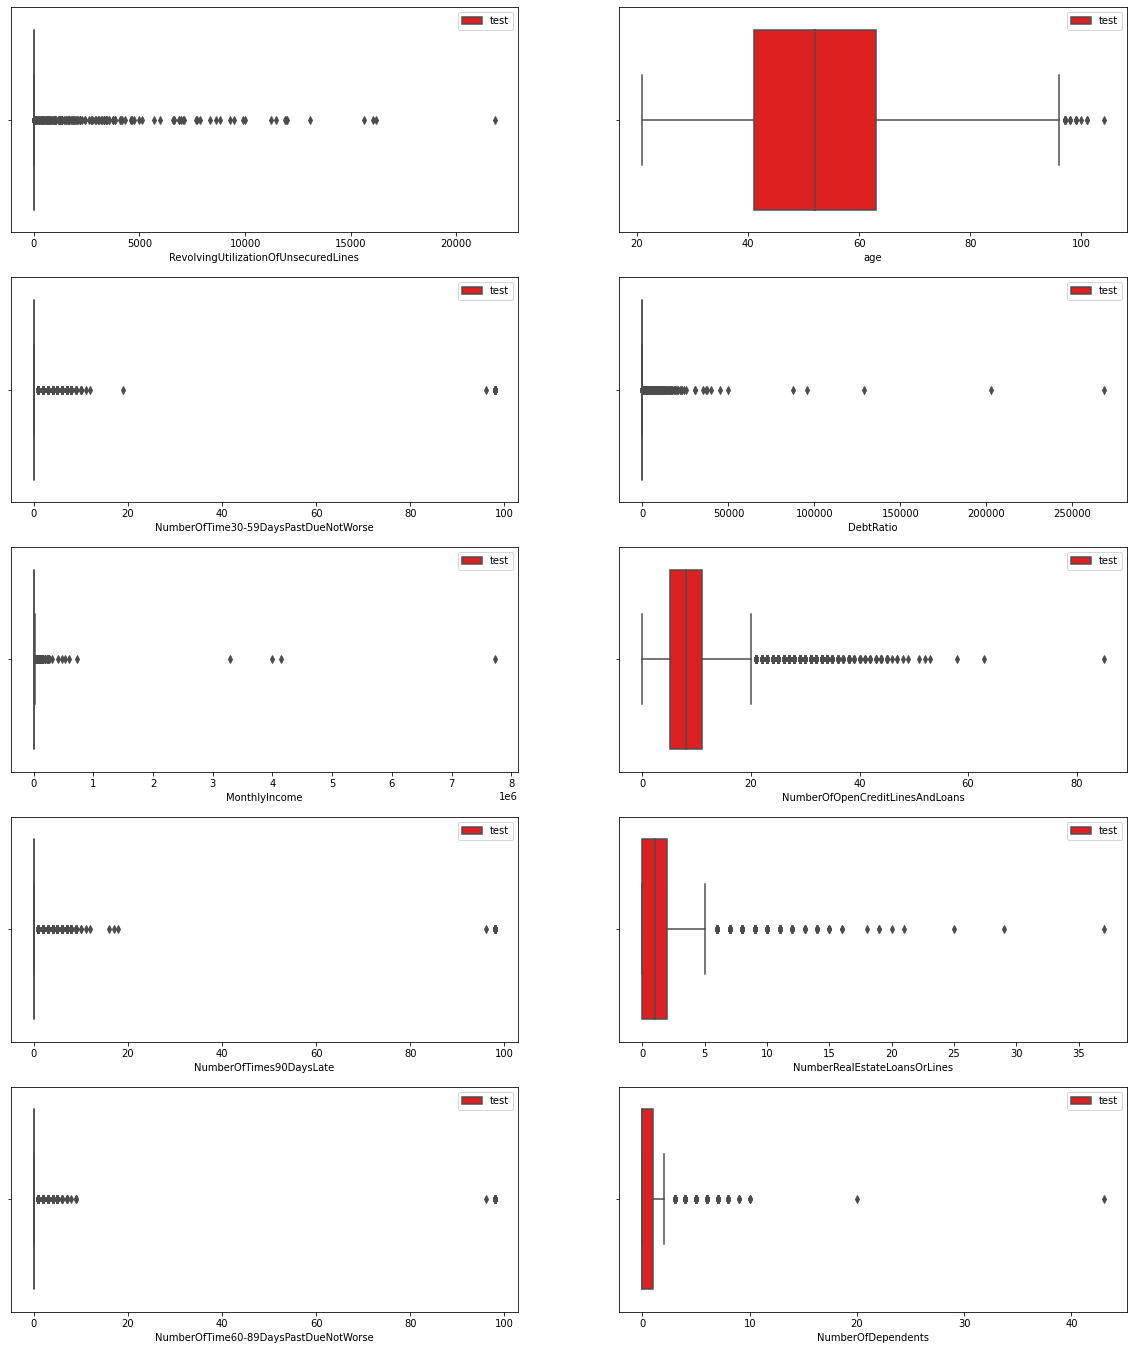

In [87]:
# box plot of test set features to find outliers 
fig, ax = plt.subplots(5, 2,figsize=(20, 24))
i=1
for index,feature in enumerate(df_test.columns):
    plt.subplot(5, 2,i)
    sn.boxplot(df_test[feature],color="red")
    plt.xlabel(feature)
    i += 1
    plt.legend(labels=['test'])
plt.show()

<AxesSubplot:>

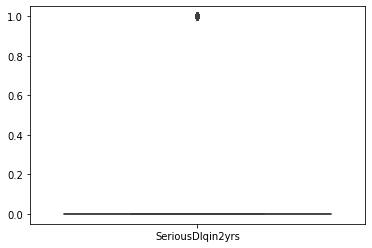

In [88]:
sn.boxplot(data=df_train_target)

**Target Distribution**

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

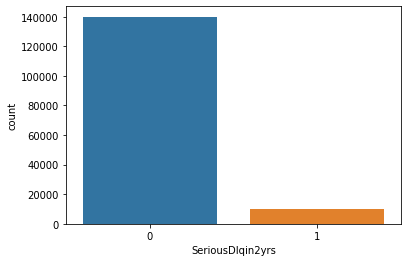

In [14]:
sn.countplot(x ='SeriousDlqin2yrs', data = df_train_target)

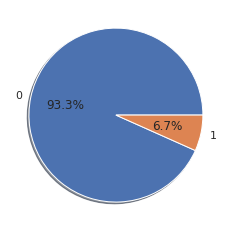

In [97]:
labels = train['SeriousDlqin2yrs'].astype('category').cat.categories.tolist()
counts = train['SeriousDlqin2yrs'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) 
plt.show()

**Correlation among features and between features and target**

<AxesSubplot:>

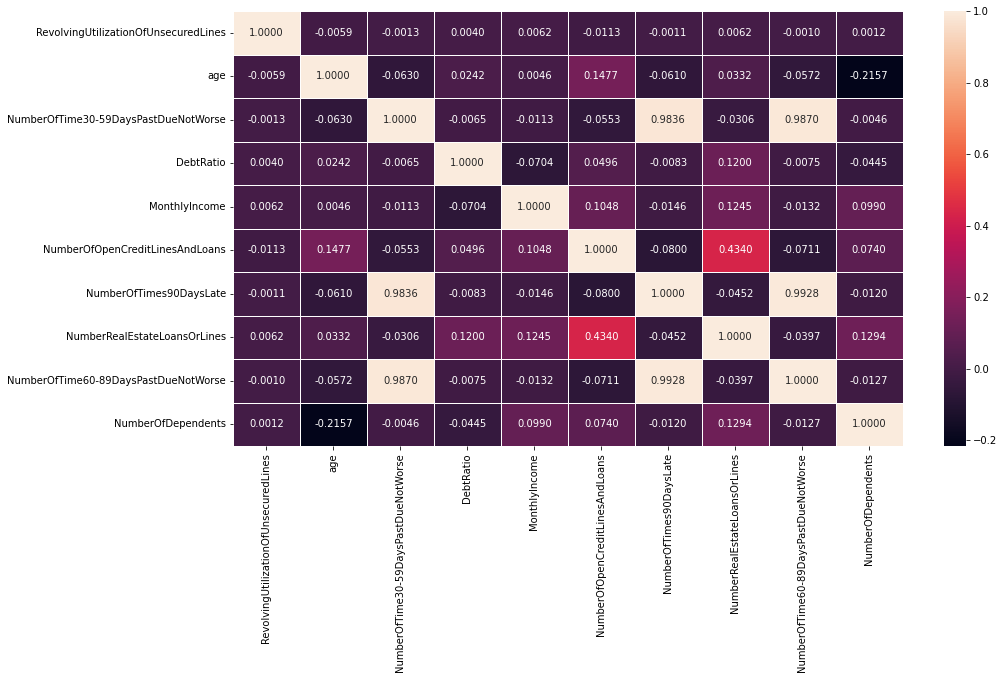

In [15]:
# Correlation between features
fig=plt.figure(figsize=(15,8))
sn.heatmap(df_train.corr(),annot = True,linewidths = .9,fmt = '.4f')

Text(0.5, 1.0, 'Correlation with target')

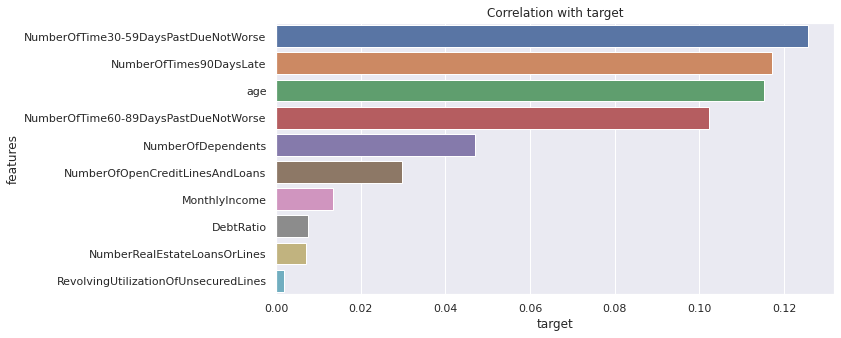

In [91]:
# Correlation between features and target
corrmat = train.corr()
corr_with_target = corrmat['SeriousDlqin2yrs'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['SeriousDlqin2yrs'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(10, 5))
sn.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')

**Interaction effects occurring between variables**

In [32]:
#statistic model test
import statsmodels.formula.api as smf

# Load the data
df = train
df=df.rename({'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30_59DaysPastDueNotWorse'}, axis=1)
df=df.rename({'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60_89DaysPastDueNotWorse'}, axis=1)
# Fit the model
model = smf.ols(formula='SeriousDlqin2yrs ~ RevolvingUtilizationOfUnsecuredLines + age + DebtRatio + NumberOfTime30_59DaysPastDueNotWorse + NumberOfTimes90DaysLate + NumberOfTime60_89DaysPastDueNotWorse + NumberOfOpenCreditLinesAndLoans  + NumberOfDependents  + DebtRatio:RevolvingUtilizationOfUnsecuredLines', data=df)
results = model.fit()

# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       SeriousDlqin2yrs   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     978.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:39:53   Log-Likelihood:                -466.49
No. Observations:              150000   AIC:                             953.0
Df Residuals:                  149990   BIC:                             1052.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [29]:
#Kruskal-Wallis test
from scipy.stats import kruskal, ranksums

# Load the data into a Pandas DataFrame
df = train

# Select the columns to use in the test
columns = ['RevolvingUtilizationOfUnsecuredLines', 'MonthlyIncome','DebtRatio','NumberRealEstateLoansOrLines']

# Create a list of the groups
groups = [df[column] for column in columns]

# Perform the Kruskal-Wallis test
kruskal_statistic, kruskal_p_value = kruskal(*groups)

# Print the results of the Kruskal-Wallis test
print('Kruskal-Wallis statistic:', kruskal_statistic)
print('Kruskal-Wallis p-value:', kruskal_p_value)

# Interpret the results of the Kruskal-Wallis test
if kruskal_p_value < 0.05:
    print('There is a significant difference in the distribution of the groups.')
else:
    print('There is no significant difference in the distribution of the groups.')


Kruskal-Wallis statistic: 137365.06041338432
Kruskal-Wallis p-value: 0.0
There is a significant difference in the distribution of the groups.


In [30]:
# Perform the Wilcoxon rank-sum test
for i in range(len(groups) - 1):
    for j in range(i + 1, len(groups)):
        statistic, p_value = ranksums(groups[i], groups[j])
        
        # Print the results of the Wilcoxon rank-sum test
        print('\nWilcoxon rank-sum test for groups {} and {}:'.format(i + 1, j + 1))
        print('Statistic:', statistic)
        print('P-value:', p_value)
        
        # Interpret the results of the Wilcoxon rank-sum test
        if p_value < 0.05:
            print('There is a significant difference in the medians of the groups.')
        else:
            print('There is no significant difference in the medians of the groups.')


Wilcoxon rank-sum test for groups 1 and 2:
Statistic: -282.80925873893307
P-value: 0.0
There is a significant difference in the medians of the groups.

Wilcoxon rank-sum test for groups 1 and 3:
Statistic: -148.0102762048663
P-value: 0.0
There is a significant difference in the medians of the groups.

Wilcoxon rank-sum test for groups 1 and 4:
Statistic: -123.90502743187771
P-value: 0.0
There is a significant difference in the medians of the groups.

Wilcoxon rank-sum test for groups 2 and 3:
Statistic: 263.16996203595767
P-value: 0.0
There is a significant difference in the medians of the groups.

Wilcoxon rank-sum test for groups 2 and 4:
Statistic: 311.3924063729596
P-value: 0.0
There is a significant difference in the medians of the groups.

Wilcoxon rank-sum test for groups 3 and 4:
Statistic: 7.9659832530146035
P-value: 1.6391514179855937e-15
There is a significant difference in the medians of the groups.


**Training Model**

In [16]:
#splitting input dataset into train and validation set
X_train, X_val, y_train, y_val = train_test_split(df_train.fillna(0),df_train_target['SeriousDlqin2yrs'].values, test_size=0.20,random_state=10, shuffle = True)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(120000, 10)
(120000,)
(30000, 10)
(30000,)


In [18]:
# Creating Pipeline Function for model
def createpipeline(classifier,feature_selection,encoder):

  
    enc = {
        'Label': OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
        'OneHot': OneHotEncoder(handle_unknown='ignore')
    }
    numeric_transformer = Pipeline([('Impt', SimpleImputer(strategy='constant')),('scaler', StandardScaler()),]) # Numerical Column Transformation.
    categorical_transformer = Pipeline([('Impt', SimpleImputer(strategy='most_frequent')),('encoder', enc[encoder]),]) # Categorical Column Transformation.  
    preprocessor = ColumnTransformer(
        transformers=[
            ("Numerical_transform", numeric_transformer, make_column_selector(dtype_include="number")),
            ("Categorical_transform", categorical_transformer, make_column_selector(dtype_exclude="number")),
        ]
    )  
    return Pipeline(steps=[('preprocessor', preprocessor)] + [('feature_select', feature_selection)] + [('classifier', classifier)])

**Test 1 : using MLP classifier**

In [19]:
classifer=MLPClassifier(hidden_layer_sizes='hidden_layer_sizes', 
                        activation = 'activation',solver='solver',
                        alpha='alpha',learning_rate='learning_rate',
                        max_iter=200)
feature_selection=RFECV( min_features_to_select='min_features_to_select', verbose =3,estimator=LinearRegression())
ecoder='Label'
pipe = createpipeline(classifer,feature_selection,ecoder)

In [20]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0ecf2b3290>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                  <sklearn.compose._column_transform

In [21]:
parameter_space = {
    'classifier__hidden_layer_sizes': [(10,), (100,), (1000,),(50,50,50), (50,100,50), (10,100,10)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.05,0.001,0.0001,0.00001,0.00001],
    'classifier__learning_rate': ['constant','adaptive'],
    'feature_select__min_features_to_select':[1,2,3]
}

# Search for best hyperparamters
cv_strategy = StratifiedKFold(n_splits=2, shuffle=True) # Cross-validation Method
search = RandomizedSearchCV(pipe, parameter_space, n_jobs=-1, cv=cv_strategy, scoring='f1_weighted').fit(X_train, y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimato

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimato

In [22]:
print('BEST PARAMS:', search.best_params_)

BEST PARAMS: {'feature_select__min_features_to_select': 3, 'classifier__solver': 'adam', 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (1000,), 'classifier__alpha': 1e-05, 'classifier__activation': 'relu'}


In [23]:
pipe = search.best_estimator_

In [24]:
# fir the model on best hyperparameters
pipe.fit(X_train,y_train)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimato

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0ecea5ad90>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEnc

In [25]:
# Test on Validation set
y_pred_val = pipe.predict(X_val) 
print(accuracy_score(y_val, y_pred_val))

0.9356333333333333


In [26]:
#Quantitative Metrics
report = classification_report(y_val, y_pred_val, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
0,0.943998,0.989708,0.966313,27983.000000
1,0.564955,0.185424,0.279209,2017.000000
accuracy,0.935633,0.935633,0.935633,0.935633
macro avg,0.754476,0.587566,0.622761,30000.000000
weighted avg,0.918513,0.935633,0.920116,30000.000000


<AxesSubplot:>

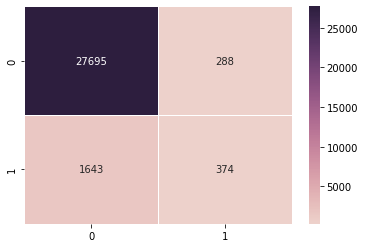

In [27]:
# Confusion Matrix
cf_matrix=confusion_matrix(y_val, y_pred_val)
sn.heatmap(cf_matrix, annot=True,fmt=".0f", cmap=sn.cubehelix_palette(as_cmap=True),linewidth=.5)

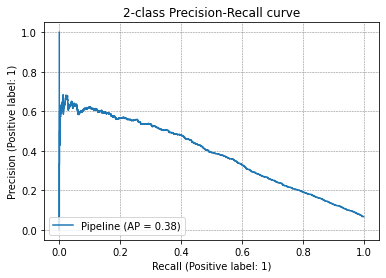

In [28]:
# Plot PRC Curve
display = PrecisionRecallDisplay.from_estimator(
    pipe, X_val, y_val
)
sn.set()
display.ax_.set_title("2-class Precision-Recall curve")
plt.grid(color='gray', linestyle='--', linewidth=0.5)

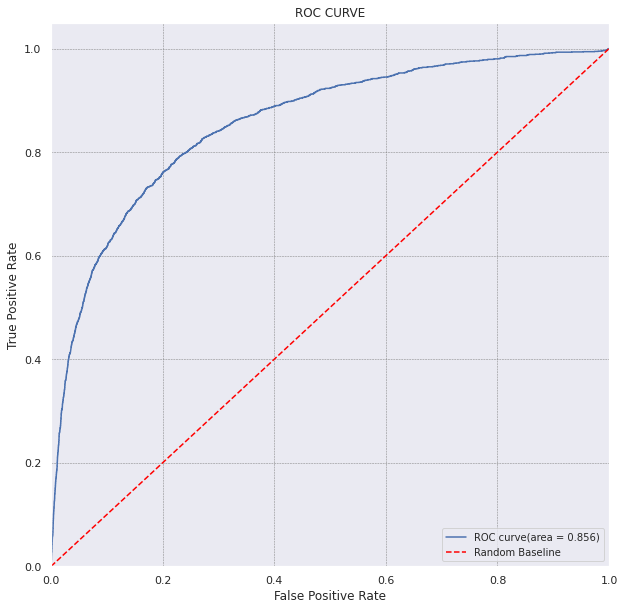

In [29]:
# Plot Roc Curve
fig = plt.figure(figsize=(10, 10))
# Get FPR, TPR and AUC
fpr, tpr, _ = roc_curve(y_val,pipe.predict_proba(X_val)[:,1].ravel())
roc_auc = auc(fpr, tpr)
sn.set()
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small')

**Test 2 : using XGBoost classifier**

In [31]:
classifer1=XGBClassifier()
feature_selection1= SelectFromModel(estimator=LinearSVC(C=0.1, penalty="l1", dual=False,max_iter=2000))
ecoder1='Label'
pipe1 = createpipeline(classifer1,feature_selection1,ecoder1)

In [32]:
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0f38b4a590>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                               gamma=None, gpu_id=None, grow_policy=None,
          

In [33]:
parameter_space = {
    'classifier__max_depth': [1,2,3,4,5,6,7],
    'classifier__n_estimators' : [100,150,200,250,300,350,400],
    'classifier__learning_rate' : [0.05,0.10,0.01,0.001,0.0001],
    'classifier__gamma' : [0.0,0.1,0.2,0.3],
    'classifier__colsample_bytree' : [0.5,0.7],
    'classifier__max_depth' : [3,4,6,8]
}

# Search for best hyperparamters
cv_strategy = StratifiedKFold(n_splits=2, shuffle=True) # Cross-validation Method
search = RandomizedSearchCV(pipe1, parameter_space, cv=cv_strategy, scoring='f1_macro', random_state=0, verbose=1,n_iter=30,).fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


In [34]:
print('BEST PARAMS:', search.best_params_)

BEST PARAMS: {'classifier__n_estimators': 250, 'classifier__max_depth': 4, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0.3, 'classifier__colsample_bytree': 0.5}


In [35]:
pipe1 = search.best_estimator_

In [36]:
pipe1.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numerical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0ecf66ad10>),
                                                 ('Categorical_transform',
                                                  Pipeline(steps=[('Impt',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                               gamma=0.3, gpu_id=-1, grow_policy='depthwise',
      

In [37]:
y_pred_val1 = pipe1.predict(X_val) 
print(accuracy_score(y_val, y_pred_val1))

0.9381666666666667


In [38]:
#Quantitative Metrics
report = classification_report(y_val, y_pred_val1, output_dict=True)
results = pd.DataFrame(report).transpose()
results

,precision,recall,f1-score,support
0,0.945262,0.991102,0.967640,27983.000000
1,0.622727,0.203768,0.307060,2017.000000
accuracy,0.938167,0.938167,0.938167,0.938167
macro avg,0.783995,0.597435,0.637350,30000.000000
weighted avg,0.923577,0.938167,0.923227,30000.000000


<AxesSubplot:>

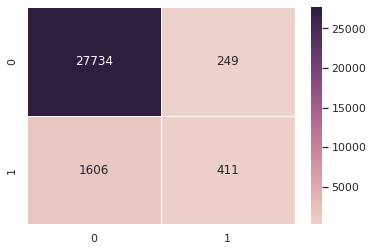

In [39]:
# Confusion Matrix
cf_matrix=confusion_matrix(y_val, y_pred_val1)
sn.heatmap(cf_matrix, annot=True,fmt=".0f", cmap=sn.cubehelix_palette(as_cmap=True),linewidth=.5)

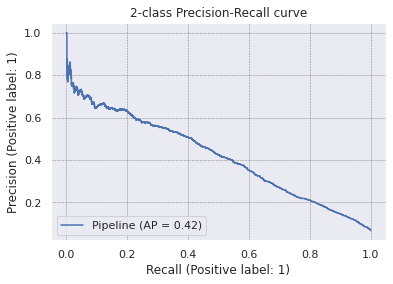

In [40]:
# Plot PRC Curve
display = PrecisionRecallDisplay.from_estimator(
    pipe1, X_val, y_val
)
sn.set()
display.ax_.set_title("2-class Precision-Recall curve")
plt.grid(color='gray', linestyle='--', linewidth=0.5)

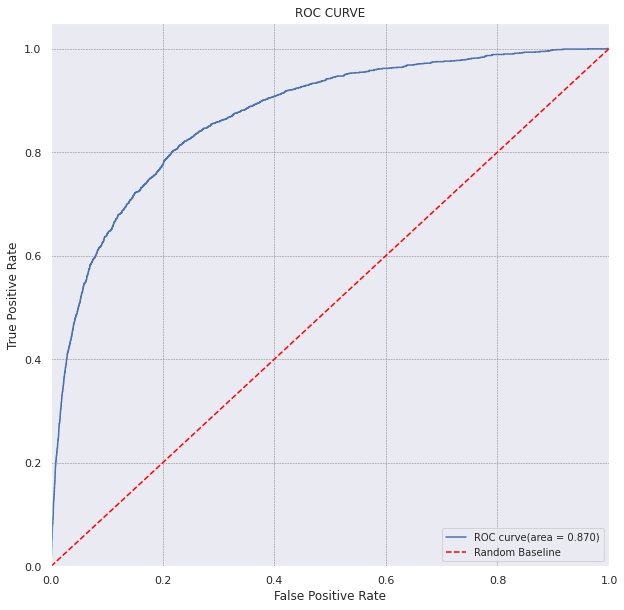

In [41]:
# Plot Roc Curve
fig = plt.figure(figsize=(10, 10))
# Get FPR, TPR and AUC
fpr, tpr, _ = roc_curve(y_val,pipe1.predict_proba(X_val)[:,1].ravel())
roc_auc = auc(fpr, tpr)
sn.set()
plt.plot(fpr, tpr, label="ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small')

**Comparing both models**

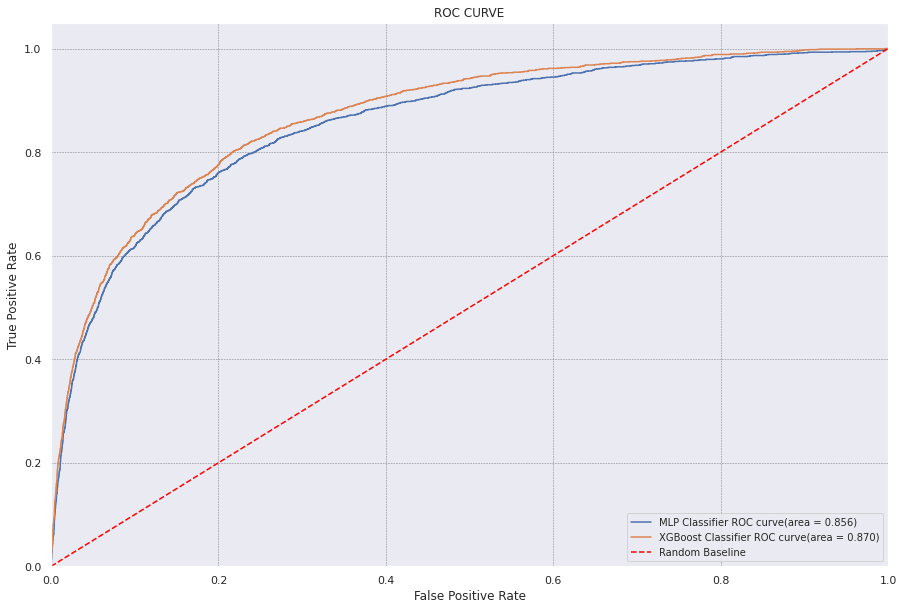

In [42]:
fig = plt.figure(figsize=(15, 10))

predictions=pipe.predict_proba(X_val)
fpr, tpr, _ = roc_curve(y_val,predictions[:,1].ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="MLP Classifier ROC curve(area = %0.3f)" % roc_auc)
predictions=pipe1.predict_proba(X_val)
fpr, tpr, _ = roc_curve(y_val,predictions[:,1].ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="XGBoost Classifier ROC curve(area = %0.3f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red",label="Random Baseline", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC CURVE")
plt.legend(loc="lower right", fontsize='small') 

XGB classifier has higher accuracy and higher area under the curve for ROC hence it gives better result than MLP Classifier

**Predicting on Test Data**

In [43]:
df_test.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


**Cleaning test data**

In [62]:
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [63]:
df_test['MonthlyIncome'].fillna(df_test['MonthlyIncome'].median(),inplace = True)
df_test['NumberOfDependents'].fillna(df_test['NumberOfDependents'].mode()[0],inplace = True)
df_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [53]:
df_test.shape

(101503, 10)

In [54]:
predictions=pipe1.predict_proba(test)
test_pred = pd.DataFrame(predictions[:,1])
test_pred.index = test_pred.index + 1
test_pred.index.name = 'Id'
test_pred = test_pred.rename(columns = {0: 'Probability'}).reset_index()
test_pred

,Id,Probability
0,1,0.065198
1,2,0.050485
2,3,0.014414
3,4,0.106737
4,5,0.082611
...,...,...
101498,101499,0.030362
101499,101500,0.366366
101500,101501,0.005082
101501,101502,0.085343


In [60]:
# Converting predictions dataframe into csv file
test_pred.to_csv('Test_Result.csv', index = False)

**Analysing the effects on differnt features on prediction of target**

In [28]:
#training XGBClassifier
Model = XGBClassifier(n_estimators= 250, max_depth= 4, learning_rate= 0.1, gamma= 0.3, colsample_bytree= 0.5)

In [33]:
Model.fit(df_train,df_train_target['SeriousDlqin2yrs'].values)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=250,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


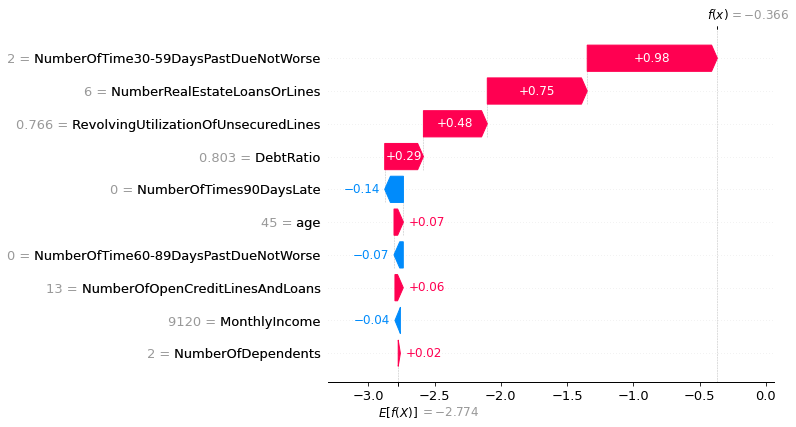

In [34]:
explainer = shap.Explainer(Model)
shap_values = explainer(df_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

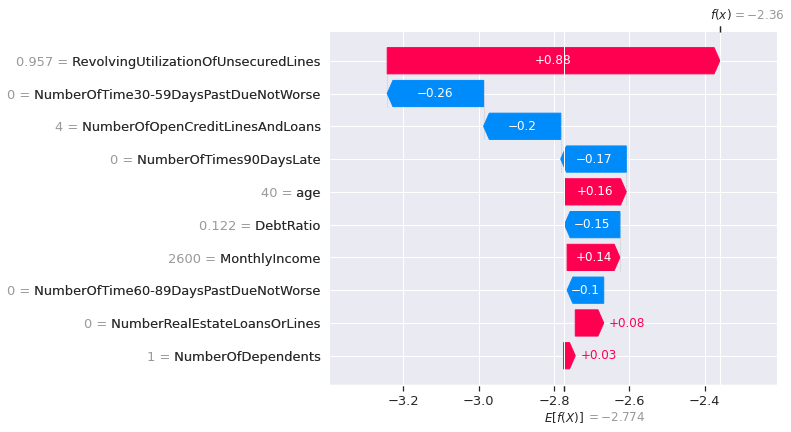

In [74]:
shap.plots.waterfall(shap_values[1])